In [11]:
import pickle
from matplotlib import pyplot as plt


In [12]:
def get_stats_dict(month, band, sat='G16'):
    pkl_loc = "../percentiles/data_pkls/{}/percentile_stats_{}_{}_2024_{}.pkl".format(band, sat, band, str(month).zfill(2))
    #print(pkl_loc)
    with open(pkl_loc, 'rb') as f:
        stats_dict = pickle.load(f)
    return stats_dict

In [13]:
all_bands_months_dict = {}
bands = ['C14', 'C15']#, 'C16']
for band in bands:
    
    all_bands_months_dict.update({band:{}})
    band_dict = get_stats_dict(1, band, 'G18')
    for key, value in band_dict.items():

        if key == 'percentiles':
            for key, value in band_dict['percentiles'].items():
                band_dict['percentiles'][key]= [value]
        else:
            band_dict[key] = [value]
    for month in range(2,13):
        stats_dict = get_stats_dict(month, band, 'G18')
        for key, value in stats_dict.items():
            if key == 'percentiles':
                for key, value in stats_dict['percentiles'].items():
                    band_dict['percentiles'][key].append(value)
            else:
                band_dict[key].append(value)
    all_bands_months_dict.update({band: band_dict})

In [8]:
print(all_bands_months_dict['C14']['percentiles'][1])

[216.12716674804688, 215.31871032714844, 216.20736694335938, 214.82777404785156, 214.58062744140625, 215.88589477539062, 215.56251525878906, 213.5803985595703, 214.4979705810547, 216.4472198486328, 218.86668395996094, 215.88589477539062]


In [9]:
percentiles = [                                                                                                                                                                                     
    1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,                                                                                                                                               
    6.0, 7.0, 8.0, 9.0, 10.0,                                                                                                                                                                       
    25.0, 50.0, 75.0,                                                                                                                                                                               
    90.0, 91.0, 92.0, 93.0, 94.0, 95.0,                                                                                                                                                             
    95.5, 96.0, 96.5, 97.0, 97.5, 98.0, 98.5, 99.0, 99.5                                                                                                                                            
]  
import calendar
months = list(range(1,13))
# Labels: Jan, Feb, ..., Dec
month_labels = [calendar.month_abbr[m] for m in months]

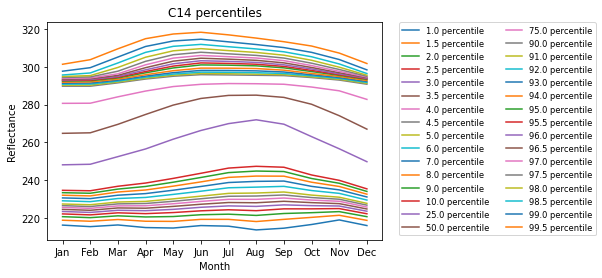

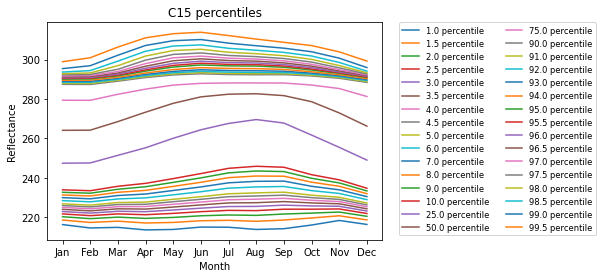

In [10]:
p_1 = []
p_99 = []
#for band in bands:
band = 'C14'
for band in bands:
    for perc in percentiles:
        plt.plot(months, all_bands_months_dict[band]['percentiles'][perc],  label='{} percentile'.format(perc))
    #plt.legend()
    #plt.legend(ncol=2, fontsize='small')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small', ncol=2)

    plt.title("{} percentiles".format(band))
    plt.xlabel('Month')
    plt.xticks(months, month_labels)
    plt.ylabel('Reflectance')
    plt.show()

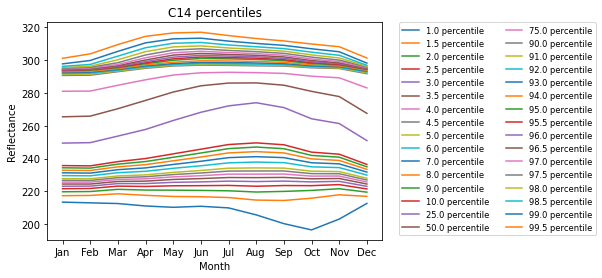

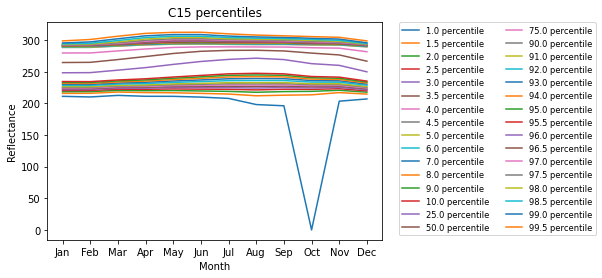

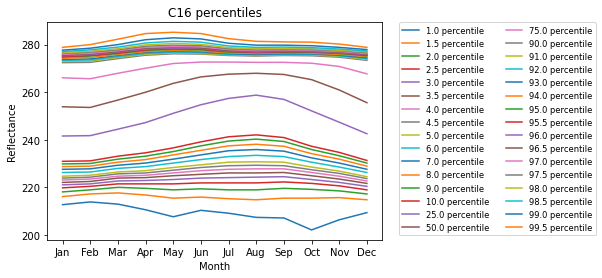

In [12]:
p_1 = []
p_99 = []
#for band in bands:
band = 'C14'
for band in bands:
    for perc in percentiles:
        plt.plot(months, all_bands_months_dict[band]['percentiles'][perc],  label='{} percentile'.format(perc))
    #plt.legend()
    #plt.legend(ncol=2, fontsize='small')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small', ncol=2)

    plt.title("{} percentiles".format(band))
    plt.xlabel('Month')
    plt.xticks(months, month_labels)
    plt.ylabel('Reflectance')
    plt.show()

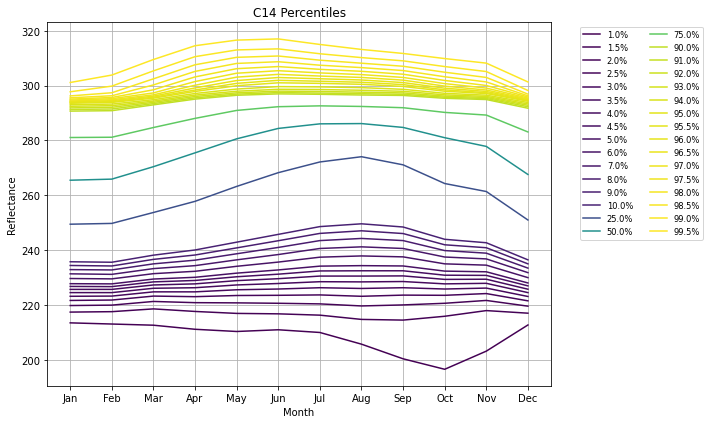

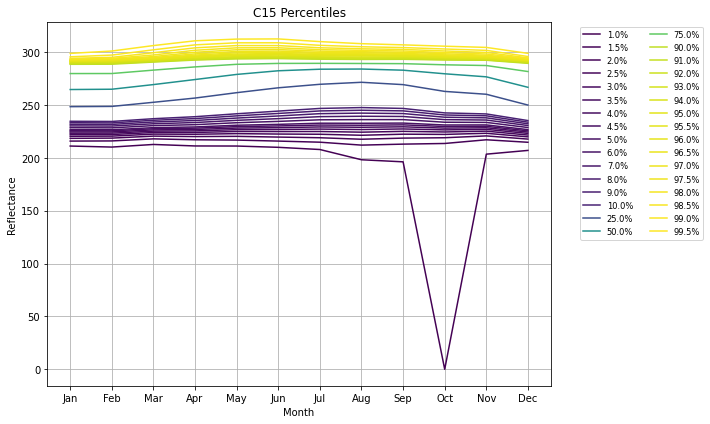

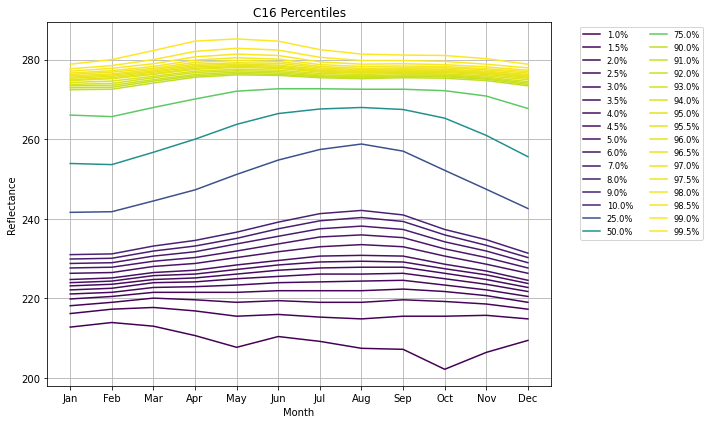

In [13]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import calendar

month_labels = [calendar.month_abbr[m] for m in months]

# Normalize the range of percentiles to [0, 1]
norm = mcolors.Normalize(vmin=min(percentiles), vmax=max(percentiles))
cmap = cm.get_cmap('viridis')

for band in bands:
    plt.figure(figsize=(10, 6))

    for perc in percentiles:
        y = all_bands_months_dict[band]['percentiles'][perc]
        color = cmap(norm(perc))  # Color in viridis, in percentile order
        plt.plot(months, y, label='{}%'.format(perc), color=color)

    plt.title("{} Percentiles".format(band))
    plt.xlabel('Month')
    plt.ylabel('Reflectance')
    plt.xticks(months, month_labels)
    plt.grid(True)

    # Legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)

    plt.tight_layout()
    plt.show()


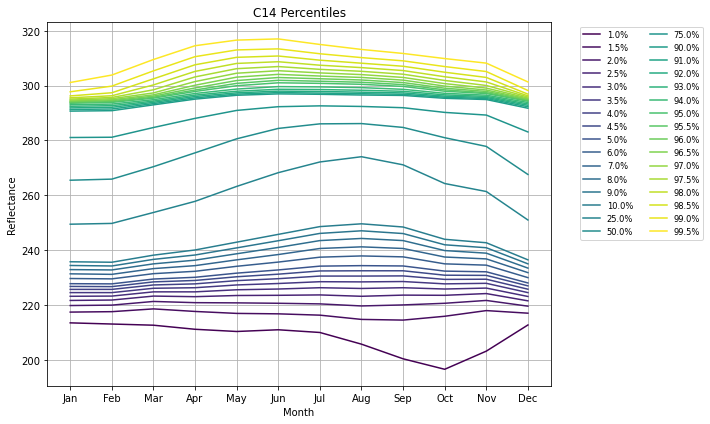

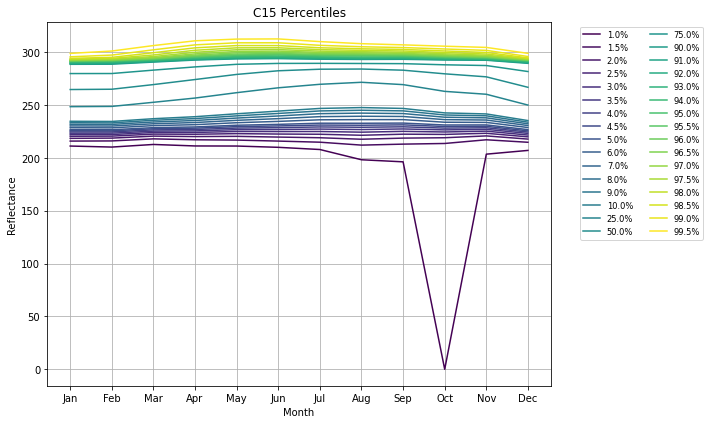

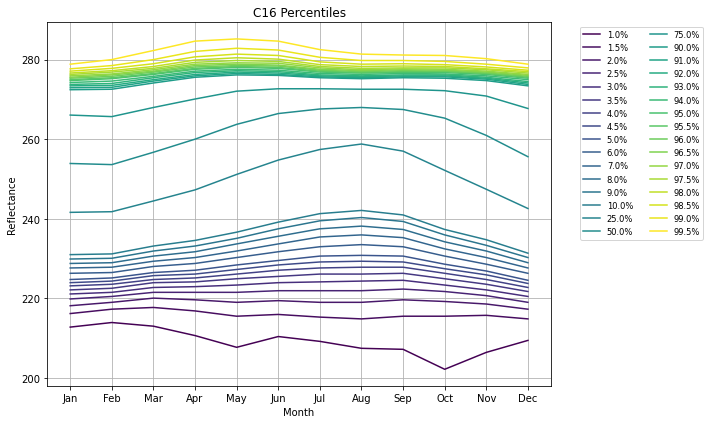

In [61]:
month_labels = [calendar.month_abbr[m] for m in months]
N = len(percentiles)
cmap = cm.get_cmap('viridis', N)  # N discrete colors

for band in bands:
    plt.figure(figsize=(10, 6))

    for i, perc in enumerate(percentiles):
        y = all_bands_months_dict[band]['percentiles'][perc]
        color = cmap(i)  # Use index-based color
        plt.plot(months, y, label='{}%'.format(perc), color=color)

    plt.title("{} Percentiles".format(band))
    plt.xlabel('Month')
    plt.ylabel('Reflectance')
    plt.xticks(months, month_labels)
    plt.grid(True)

    # Legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)

    plt.tight_layout()
    plt.show()